<a href="https://colab.research.google.com/github/allenhu08/capstone/blob/main/Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/allenhu08/capstone.git || cd capstone && git pull

Cloning into 'capstone'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 36 (delta 10), reused 15 (delta 2), pack-reused 0
Unpacking objects: 100% (36/36), done.
fatal: not a git repository (or any of the parent directories): .git


In [2]:
import pandas as pd
import numpy as np

In [179]:
df = pd.read_csv('./capstone/datasets/rawdata_new.csv')


In [4]:
print(df.columns.tolist())
print(df.head())

['id', 'date', 'total_agr_land', 'workforce', 'trees', 'arable_land', 'ley', 'perm_grass', 'perm_crops', 'prot_cult', 'add_agr_land', 'oth_land', 'qual_landscape', 'spec_crops', 'grapes', 'vegetables', 'fruits', 'oth_spec_crops', 'animal_unit', 'cattle_animal_unit', 'dairy_cows', 'suckler_cows', 'hor_shee_goa', 'pigs_poultry', 'pigs', 'poultry', 'eco_proof', 'organic', 'farmtype', 'region', 'age', 'educ', 'cons_general', 'percep_hail', 'percep_drought', 'percep_frost', 'percep_heavyrain', 'percep_longrain', 'percep_heat', 'cons_farm', 'self_reduc', 'self_act', 'self_cap', 'self_conf', 'self_not', 'legum', 'legum_eff', 'conc', 'conc_eff', 'add', 'add_eff', 'lact', 'lact_eff', 'breed', 'breed_eff', 'covman', 'covman_eff', 'comp', 'comp_eff', 'drag', 'drag_eff', 'cov', 'cov_eff', 'plough', 'plough_eff', 'solar', 'solar_eff', 'biog', 'biog_eff', 'ecodr', 'ecodr_eff', 'legum_imag', 'conc_imag', 'add_imag', 'lact_imag', 'breed_imag', 'covman_imag', 'comp_imag', 'drag_imag', 'cov_imag', 'plou

In [178]:
farm_info_cols = ['total_agr_land', 'workforce', 'trees', 'arable_land', 'ley', 'perm_grass', 'perm_crops', 'prot_cult', 'add_agr_land', 'oth_land', 'qual_landscape', 'eco_proof', 'organic',  'age'] #'farmtype', 'region',
crops_info_cols = ['spec_crops', 'grapes', 'vegetables', 'fruits', 'oth_spec_crops']
animal_info_cols = ['animal_unit', 'cattle_animal_unit', 'dairy_cows', 'suckler_cows', 'hor_shee_goa', 'pigs_poultry', 'pigs', 'poultry']
attitude_info_cols = ['educ', 'cons_general', 'percep_hail', 'percep_drought', 'percep_frost', 'percep_heavyrain', 'percep_longrain', 'percep_heat', 'cons_farm', 'self_reduc', 'self_act', 'self_cap', 'self_conf', 'self_not']
meansures_info_cols = ['legum', 'legum_eff', 'conc', 'conc_eff', 'add', 'add_eff', 'lact', 'lact_eff', 'breed', 'breed_eff', 'covman', 'covman_eff', 'comp', 'comp_eff', 'drag', 'drag_eff', 'cov', 'cov_eff', 'plough', 'plough_eff', 'solar', 'solar_eff', 'biog', 'biog_eff', 'ecodr', 'ecodr_eff']
measures_effect_info_cols = ['legum_eff', 'conc_eff', 'add_eff', 'lact_eff', 'breed_eff', 'covman_eff', 'comp_eff', 'drag_eff', 'cov_eff', 'plough_eff', 'solar_eff', 'biog_eff', 'ecodr_eff']

# df = df[farm_info_cols + crops_info_cols + animal_info_cols + meansures_info_cols]
effect_df = df[measures_effect_info_cols]
effect_df = effect_df.fillna(0)
effect_df.head()
effect_vals = effect_df.values



In [28]:
from scipy.linalg import sqrtm

def compute_svd(vals, k):
  # The magic happens here. U and V are user and item features
  U, s, V=np.linalg.svd(vals, full_matrices=False)
  s=np.diag(s)
  # we take only the k most significant features
  s=s[0:k,0:k]
  U=U[:,0:k]
  V=V[0:k,:]
  s_root=sqrtm(s)
  Usk = np.dot(U,s_root)
  skV = np.dot(s_root,V)
  UsV = np.dot(Usk, skV)

  return UsV

In [29]:

from sklearn.metrics import mean_squared_error

for k in range(2, len(effect_vals[0])):
  pred = compute_svd(effect_vals, k)

  print("k: ", k, " RMSE: ", mean_squared_error(effect_df, pred))

k:  2  RMSE:  1.2411394057543548
k:  3  RMSE:  1.0448868231714885
k:  4  RMSE:  0.859584740839658
k:  5  RMSE:  0.6913652961208363
k:  6  RMSE:  0.5666829435784825
k:  7  RMSE:  0.45479518487252946
k:  8  RMSE:  0.3486809065245669
k:  9  RMSE:  0.2618138692095433
k:  10  RMSE:  0.1765491842243626
k:  11  RMSE:  0.10162660795575242
k:  12  RMSE:  0.04373837283886026


In [68]:
def mask_v1(row):
  return 0

def learn_k(vals, mask_fn):
  num_records = len(vals)
  # print("num_records:", num_records)
  ks = []
  errs = []
  for i in range(num_records):
    arr = np.copy(vals)
    arr[i] = mask_fn(arr[i]) #
    best_k = 2
    min_err = float('inf')
    
    for k in range(2, len(arr[0])):
      pred = compute_svd(arr, k)
      err = mean_squared_error(vals[i], pred[i])
      # err = abs(sum(vals[i] - pred[i]))
      # print("i: ", i, " - k: ", k, " - err ", err)
      if (err < min_err):
        min_err = err
        best_k = k
    
    # print("i: ", i, " - k: ", best_k, " RMSE: ", err)
    ks.append(best_k)
    errs.append(min_err)

  return ks, errs


In [139]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(42)  # deterministic random data

def plot_learning_results(vals, mask_fn):
  ks, errs = learn_k(vals, mask_fn)

  np.histogram(ks)
  _ = plt.hist(ks, bins='auto')  # arguments are passed to np.histogram
  mode = max(set(ks), key=ks.count)
  leg = 'mode: {}'.format(mode)
  plt.title("Distribution of Best Ks ({})".format(leg))
  plt.show()


  np.histogram(errs)
  _ = plt.hist(errs, bins='auto')  # arguments are passed to np.histogram
  mean = np.mean(errs)
  leg = 'mean: {}'.format(mean)
  plt.title("Distribution of Errors ({})".format(leg))
  plt.show()


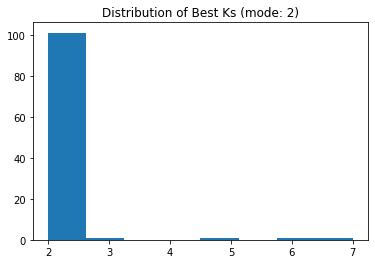

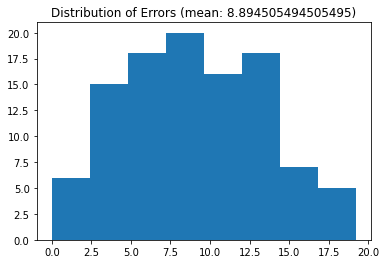

In [140]:

plot_learning_results(effect_vals, mask_v1)

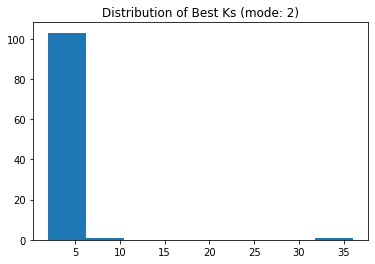

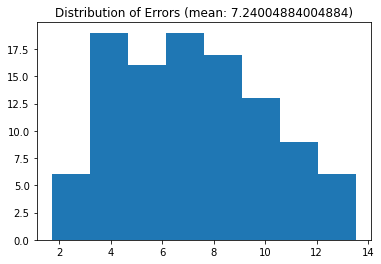

In [141]:
meansures_vals = df[meansures_info_cols + measures_effect_info_cols].fillna(0).values


plot_learning_results(meansures_vals, mask_v1)


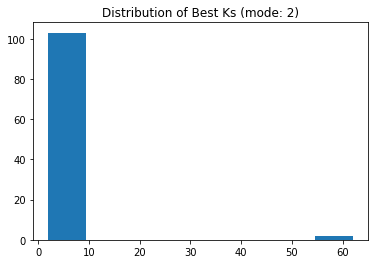

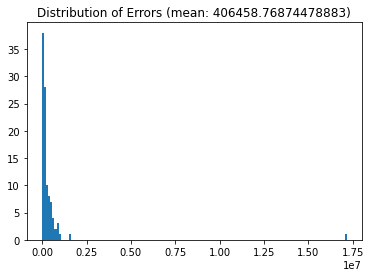

In [142]:
all_vals = df[farm_info_cols + crops_info_cols + animal_info_cols + meansures_info_cols + measures_effect_info_cols].fillna(0).values
plot_learning_results(all_vals, mask_v1)

In [143]:
import random

def mask_v2(row):
  replace = [True, False]
  for i in range(len(row)):
    if random.choice(replace):
      row[i] = 0
  
  return row

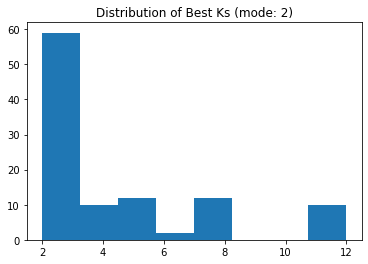

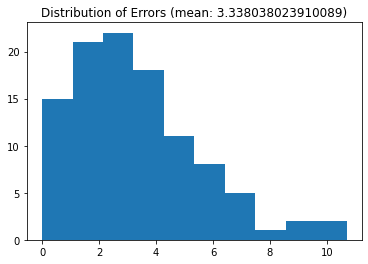

In [144]:
plot_learning_results(effect_vals, mask_v2)

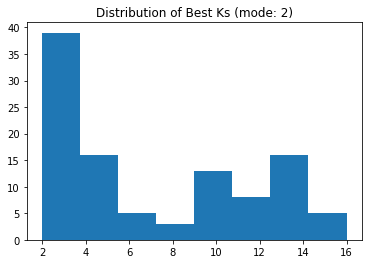

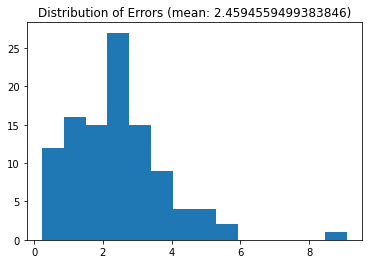

In [145]:
plot_learning_results(meansures_vals, mask_v2)

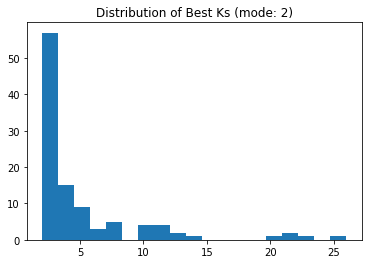

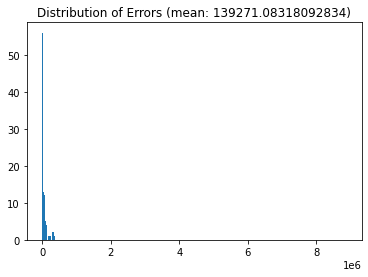

In [146]:
plot_learning_results(all_vals, mask_v2)

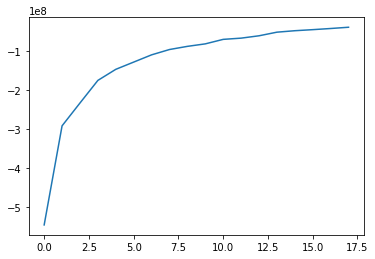

In [156]:
from sklearn.cluster import KMeans

traits_df = df[farm_info_cols + crops_info_cols + animal_info_cols].fillna(0)

scores = []
for i in range(2, 20):
  score = KMeans(n_clusters=i, random_state=42).fit(traits_df).score(traits_df)
  # print("cluster: ", i, " score ", score)
  scores.append(score)


plt.plot(scores)
plt.show()


In [183]:
n_clusters=4
model = KMeans(n_clusters=n_clusters, random_state=42).fit(traits_df)

model.labels_

trait_col = "trait_cluster"

df_with_trait = df.fillna(0)
df_with_trait.insert(1, trait_col, model.labels_)
df_with_trait

,id,trait_cluster,date,total_agr_land,workforce,trees,arable_land,ley,perm_grass,perm_crops,...,network,GHG_goal,env_goal,biodiv_goal,acknow_goal,yield_goal,income_goal,info_gew,info_resul,interviewtime
0,1,2,13.03.2019 10:59,4925.0,1.95406,79,3871,107,793,140,...,2,1,5,6,4,3,2,2,2,999.53
1,2,0,13.03.2019 11:08,2176.0,6.61310,12,1671,0,98,338,...,1,3,4,2,1,6,5,2,2,901.99
2,3,0,13.03.2019 11:37,2251.0,1.39384,31,1507,279,380,81,...,3,1,4,2,3,6,5,1,1,1832.99
3,4,0,13.03.2019 13:54,2389.0,1.99523,3,1969,71,322,0,...,1,2,5,4,1,3,6,2,1,2001.28
4,5,0,13.03.2019 14:18,3205.0,3.09942,39,1911,675,461,117,...,3,1,6,3,2,5,4,2,2,1809.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,101,0,15.04.2019 21:22,1786.0,0.86598,32,719,646,167,0,...,1,3,6,5,4,2,1,2,2,3430.37
101,102,3,02.05.2019 11:02,876.0,4.29667,0,0,227,260,389,...,3,3,5,4,1,2,6,2,1,5144.29
102,103,0,03.05.2019 19:39,2995.0,2.96772,64,879,987,1115,0,...,3,4,5,3,1,2,6,1,1,1371.41
103,104,2,06.05.2019 11:32,6520.0,4.04098,0,4720,374,1385,0,...,4,3,6,4,1,2,5,2,1,3201.48


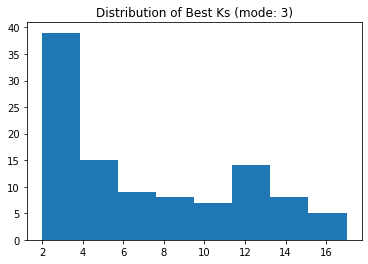

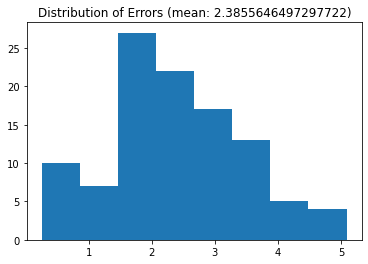

In [184]:
trait_measure_vals = df_with_trait[[trait_col] + meansures_info_cols + measures_effect_info_cols].values
plot_learning_results(trait_measure_vals, mask_v2)


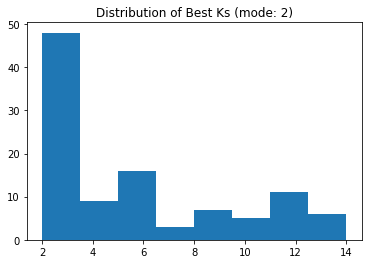

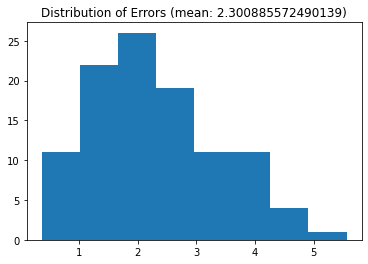

In [188]:
def learn_k_clustered(df, mask_fn):
  ks = []
  errs = []
  for n in range(n_clusters):
    vals = df[df[trait_col] == n].drop(columns=[trait_col]).values
    num_records = len(vals)
    for i in range(num_records):
      arr = np.copy(vals)
      arr[i] = mask_fn(arr[i]) #
      best_k = 2
      min_err = float('inf')
    
      for k in range(2, len(arr[0])):
        pred = compute_svd(arr, k)
        err = mean_squared_error(vals[i], pred[i])
        # err = abs(sum(vals[i] - pred[i]))
        # print("i: ", i, " - k: ", k, " - err ", err)
        if (err < min_err):
          min_err = err
          best_k = k
    
      # print("i: ", i, " - k: ", best_k, " RMSE: ", err)
      ks.append(best_k)
      errs.append(min_err)

  return ks, errs

trait_measure_df = df_with_trait[[trait_col] + meansures_info_cols + measures_effect_info_cols]

ks, errs = learn_k_clustered(trait_measure_df, mask_v2)

np.histogram(ks)
_ = plt.hist(ks, bins='auto')  # arguments are passed to np.histogram
mode = max(set(ks), key=ks.count)
leg = 'mode: {}'.format(mode)
plt.title("Distribution of Best Ks ({})".format(leg))
plt.show()


np.histogram(errs)
_ = plt.hist(errs, bins='auto')  # arguments are passed to np.histogram
mean = np.mean(errs)
leg = 'mean: {}'.format(mean)
plt.title("Distribution of Errors ({})".format(leg))
plt.show()

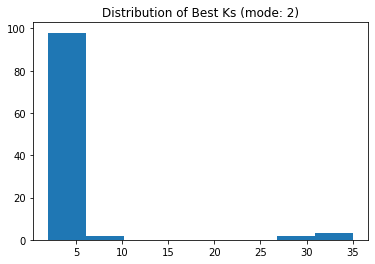

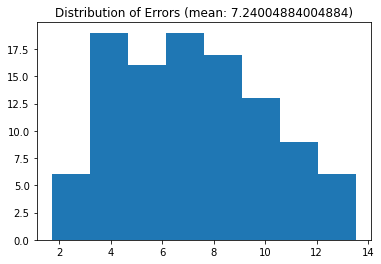

In [189]:

ks, errs = learn_k_clustered(trait_measure_df, mask_v1)

np.histogram(ks)
_ = plt.hist(ks, bins='auto')  # arguments are passed to np.histogram
mode = max(set(ks), key=ks.count)
leg = 'mode: {}'.format(mode)
plt.title("Distribution of Best Ks ({})".format(leg))
plt.show()


np.histogram(errs)
_ = plt.hist(errs, bins='auto')  # arguments are passed to np.histogram
mean = np.mean(errs)
leg = 'mean: {}'.format(mean)
plt.title("Distribution of Errors ({})".format(leg))
plt.show()